In [26]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


## "A puzzling numerical experiment"

This notebook tries to reproduce the numerical experiment of [1]. 
It uses the ASTRA Toolbox [2] for the tomography operators, and the spire package [3] for the TV solver.


[1]
```latex
@article{candes2006robust,
	title={Robust uncertainty principles: Exact signal reconstruction from highly incomplete frequency information},
	author={Cand{\`e}s, Emmanuel J and Romberg, Justin and Tao, Terence},
	journal={IEEE Transactions on information theory},
	volume={52},
	number={2},
	pages={489--509},
	year={2006},
	publisher={IEEE}
}
```

[2] https://github.com/astra-toolbox/astra-toolbox/

[3] https://github.com/pierrepaleo/spire

In [4]:
from spire.utils import *
from spire.tomography.tomography import AstraToolbox
P0 = lambda x : tomo.proj(x)
from spire.algorithms.chambollepock import chambolle_pock_tv
tomo = AstraToolbox(512, 22)
P2 = lambda x : tomo.proj(x)/tomo.n_a*pi/2
PT2 = lambda x : tomo.fbp(x)
sl = np.load("data/SL512.npz")["data"]
si2 = P0(sl)


<IPython.core.display.Javascript object>


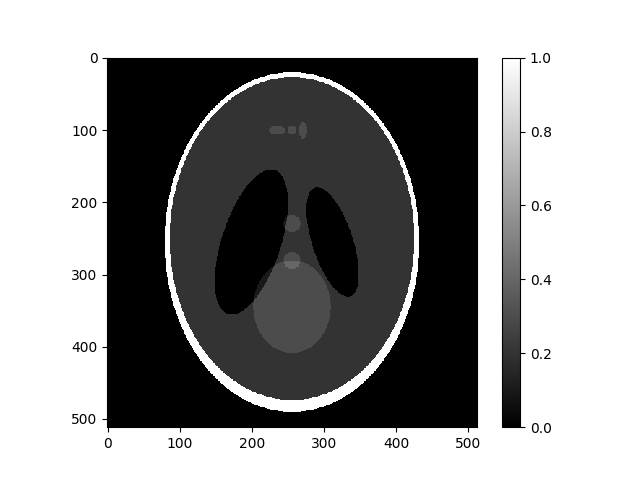

In [30]:
ims(sl, cmap="gray")

In [23]:
e_tv, r_tv = chambolle_pock_tv(si2/tomo.n_a*pi/2, P2, PT2, 8e-3, n_it=2001)

Warn: chambolle_pock(): Lipschitz constant not provided, computing it with 20 iterations
L = 7.954339e+00
[0] : energy 1.431499e+05 	 fidelity 1.431431e+05 	 TV 8.438627e+02
[10] : energy 2.893634e+04 	 fidelity 2.887927e+04 	 TV 7.133709e+03
[20] : energy 2.396598e+02 	 fidelity 1.789474e+02 	 TV 7.589056e+03
[30] : energy 2.199798e+03 	 fidelity 2.142875e+03 	 TV 7.115410e+03
[40] : energy 5.224667e+02 	 fidelity 4.687147e+02 	 TV 6.719000e+03
[50] : energy 5.590098e+01 	 fidelity 4.083060e+00 	 TV 6.477241e+03
[60] : energy 8.908515e+01 	 fidelity 3.848898e+01 	 TV 6.324521e+03
[70] : energy 6.067289e+01 	 fidelity 1.105488e+01 	 TV 6.202251e+03
[80] : energy 5.029791e+01 	 fidelity 1.462125e+00 	 TV 6.104473e+03
[90] : energy 4.982497e+01 	 fidelity 1.698368e+00 	 TV 6.015825e+03
[100] : energy 4.863985e+01 	 fidelity 1.197440e+00 	 TV 5.930301e+03
[110] : energy 4.779019e+01 	 fidelity 9.720649e-01 	 TV 5.852266e+03
[120] : energy 4.716431e+01 	 fidelity 9.000196e-01 	 TV 5.783036

<IPython.core.display.Javascript object>


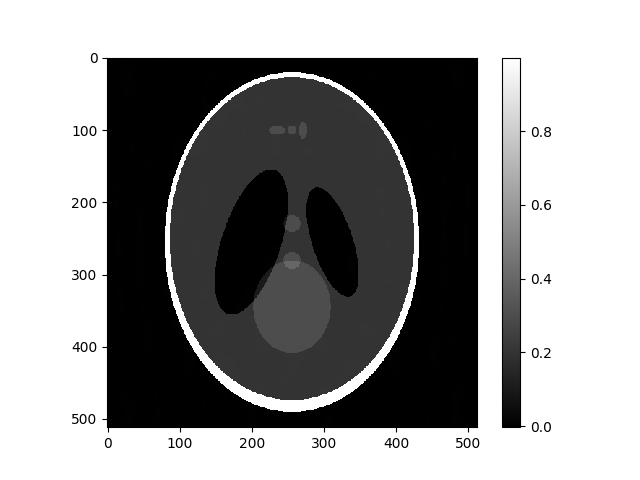

In [27]:
ims(r_tv, cmap="gray")

<IPython.core.display.Javascript object>


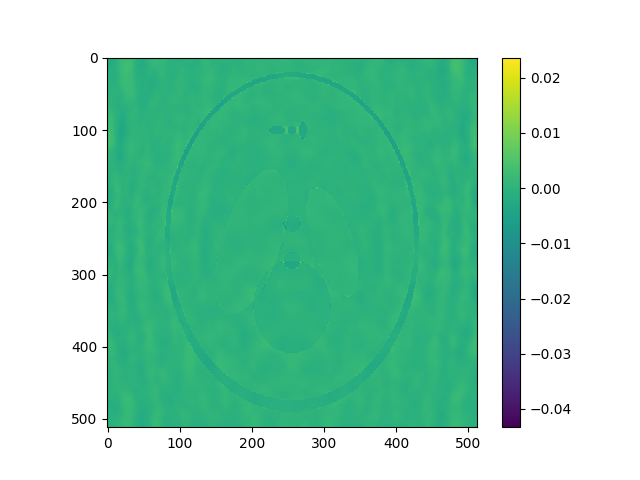

In [28]:
ims(r_tv - sl)

In [11]:
r_ls = tomo.run_algorithm("CGLS_CUDA", 200, si2)

Running CGLS_CUDA


<IPython.core.display.Javascript object>


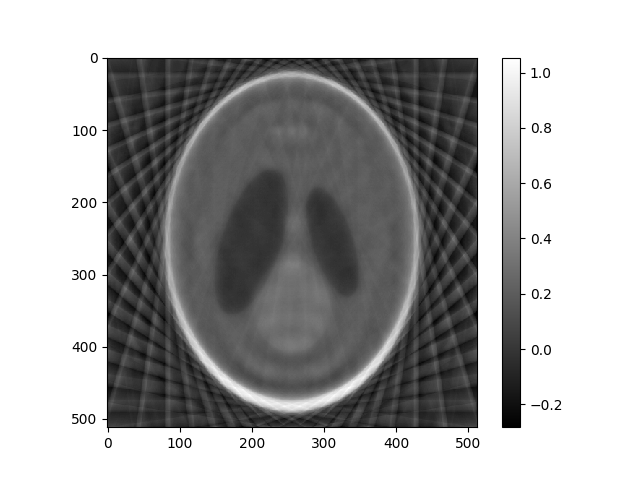

In [29]:
ims(r_ls, cmap="gray")